In [1]:
import numpy             as np
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import glob
import h5py as h
import random
import statistics as st
import seaborn as sn
import pandas as pd

%matplotlib inline

In [2]:
        
def getvalues(file):
    data = h.File(file,'r')
    return data['MC']

def getParticles(file,EventLimit=0,particle=b'opticalphoton'):
    data = h.File(file,'r')
    TotalEvents=int(data['MC']['configuration'][2][1])
    if(EventLimit>0):
        TotalEvents=EventLimit
    
    theEvents={}
    
    FudicalCount=0
    ElectronHits={}
    
    
    for Current_Event in range(0,TotalEvents):
        
        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event
        Current_Particles=data['MC']['particles'][Current_Particle_Mask]
        
        Photon_Mask = Current_Particles['particle_name'] == b'opticalphoton'
        
        #print(data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["final_x"])
        X=data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["final_x"]
        Y=data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["final_y"]
        Z=data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["final_z"]
        Volume=data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["final_volume"]
        E=data['MC']['particles'][Current_Particle_Mask][Photon_Mask]["kin_energy"]


        Pos=np.array([X,Y,Z])
        theEvents[Current_Event]=[Pos,Volume,E]
    return theEvents

def MultiFileIonizationElectronPosition(files,mother,TargetVolume=b'EL_GAP',TargetParticle=b'opticalphoton',EventLimit=2,FileName="Optical.p"):
    count=0
    values={}
    
    if(EventLimit==-1):
        EventLimit=len(files)
    filecount=0
    for file in files:
        print(f"Analyzing following  file --> {file}\n" )
        data = getvalues(file)
        TotalEvents=int(data['configuration'][2][1])
        FinalPosition={"particle_name":[],"x":[],"y":[],"z":[]}
    
        for EventID in range(0,TotalEvents):
            #Obtain current event id
            EventIDMask=data["particles"]["event_id"]==EventID
            
            #Store particle infor for this event
            ParticlesTable=data["particles"][EventIDMask]
            
            #Create Mother mask for expected mother
            MotherMask=ParticlesTable["particle_name"]==mother
            
            ## Particle Name Mask
            
            #Interested particles
            ParticleNameMask=ParticlesTable["particle_name"]==TargetParticle
            ParticlesInInterest=ParticlesTable[ParticleNameMask]
            if(TargetVolume!=None):
                IonizationElectronsMask=ParticlesInInterest["final_volume"]==TargetVolume
                ParticlesInInterest=ParticlesInInterest[IonizationElectronsMask]
           
            IonizationElectronMotherID=ParticlesInInterest["mother_id"]

            #Expected Mother IDs
            ExpectedMotherID=ParticlesTable["particle_id"][MotherMask]
            
            #Find intersection of the motherIds of ie and Expected Mother
            MotherIDMask=np.isin(IonizationElectronMotherID,ExpectedMotherID)
            FinalPosition["particle_name"]=ParticlesInInterest["particle_name"][MotherIDMask]
            FinalPosition["x"]=ParticlesInInterest["final_x"][MotherIDMask]
            FinalPosition["y"]=ParticlesInInterest["final_y"][MotherIDMask]
            FinalPosition["z"]=ParticlesInInterest["final_z"][MotherIDMask]
            values[count]=FinalPosition
            count=count+1
            
        if(filecount>=EventLimit):
            break
        filecount=filecount+1
    if(FileName=="" or FileName=="None"):
        pass
    else:
        PickleITDump(values,FileName+".p")
    print("Events are saved!")
    return values




In [6]:
pd.read_hdf("/media/ilker/Ilker/CRAB/Simulation/Alpha_170nm.h5","MC/particles")

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,2778,ie-,0,1,-17.289568,-0.331208,-49.741722,0.000469,-17.128998,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.262906,Clustering,Drift
1,0,2777,ie-,0,1,-17.298277,-0.332250,-49.742970,0.004500,-17.347136,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.252461,Clustering,Drift
2,0,2776,ie-,0,1,-17.289610,-0.331213,-49.741726,0.000489,-17.253599,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.204369,Clustering,Drift
3,0,2775,ie-,0,1,-17.300390,-0.332503,-49.743271,0.005478,-17.422174,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.240733,Clustering,Drift
4,0,2774,ie-,0,1,-17.312849,-0.333993,-49.745056,0.011245,-18.201775,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,58.168114,Clustering,Drift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410574,0,409513,ie-,0,1,-17.365299,-0.364391,-49.791252,0.071681,-17.188278,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.269972,Clustering,Drift
410575,0,409512,ie-,0,1,-17.365299,-0.364398,-49.791233,0.071660,-17.460350,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.227708,Clustering,Drift
410576,0,409511,ie-,0,1,-17.365297,-0.364407,-49.791203,0.071633,-17.457340,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.373923,Clustering,Drift
410577,0,409510,ie-,0,1,-17.365299,-0.364403,-49.791218,0.071646,-17.449486,...,0.0,0.0,0.001011,0.0,0.0,0.001011,0.000001,0.264768,Clustering,Drift


In [5]:
DataMask=Data[0][1]==b'Anode_PHOTOCATHODE'
print(len(Data[0][1][DataMask])*0.11)

31.13


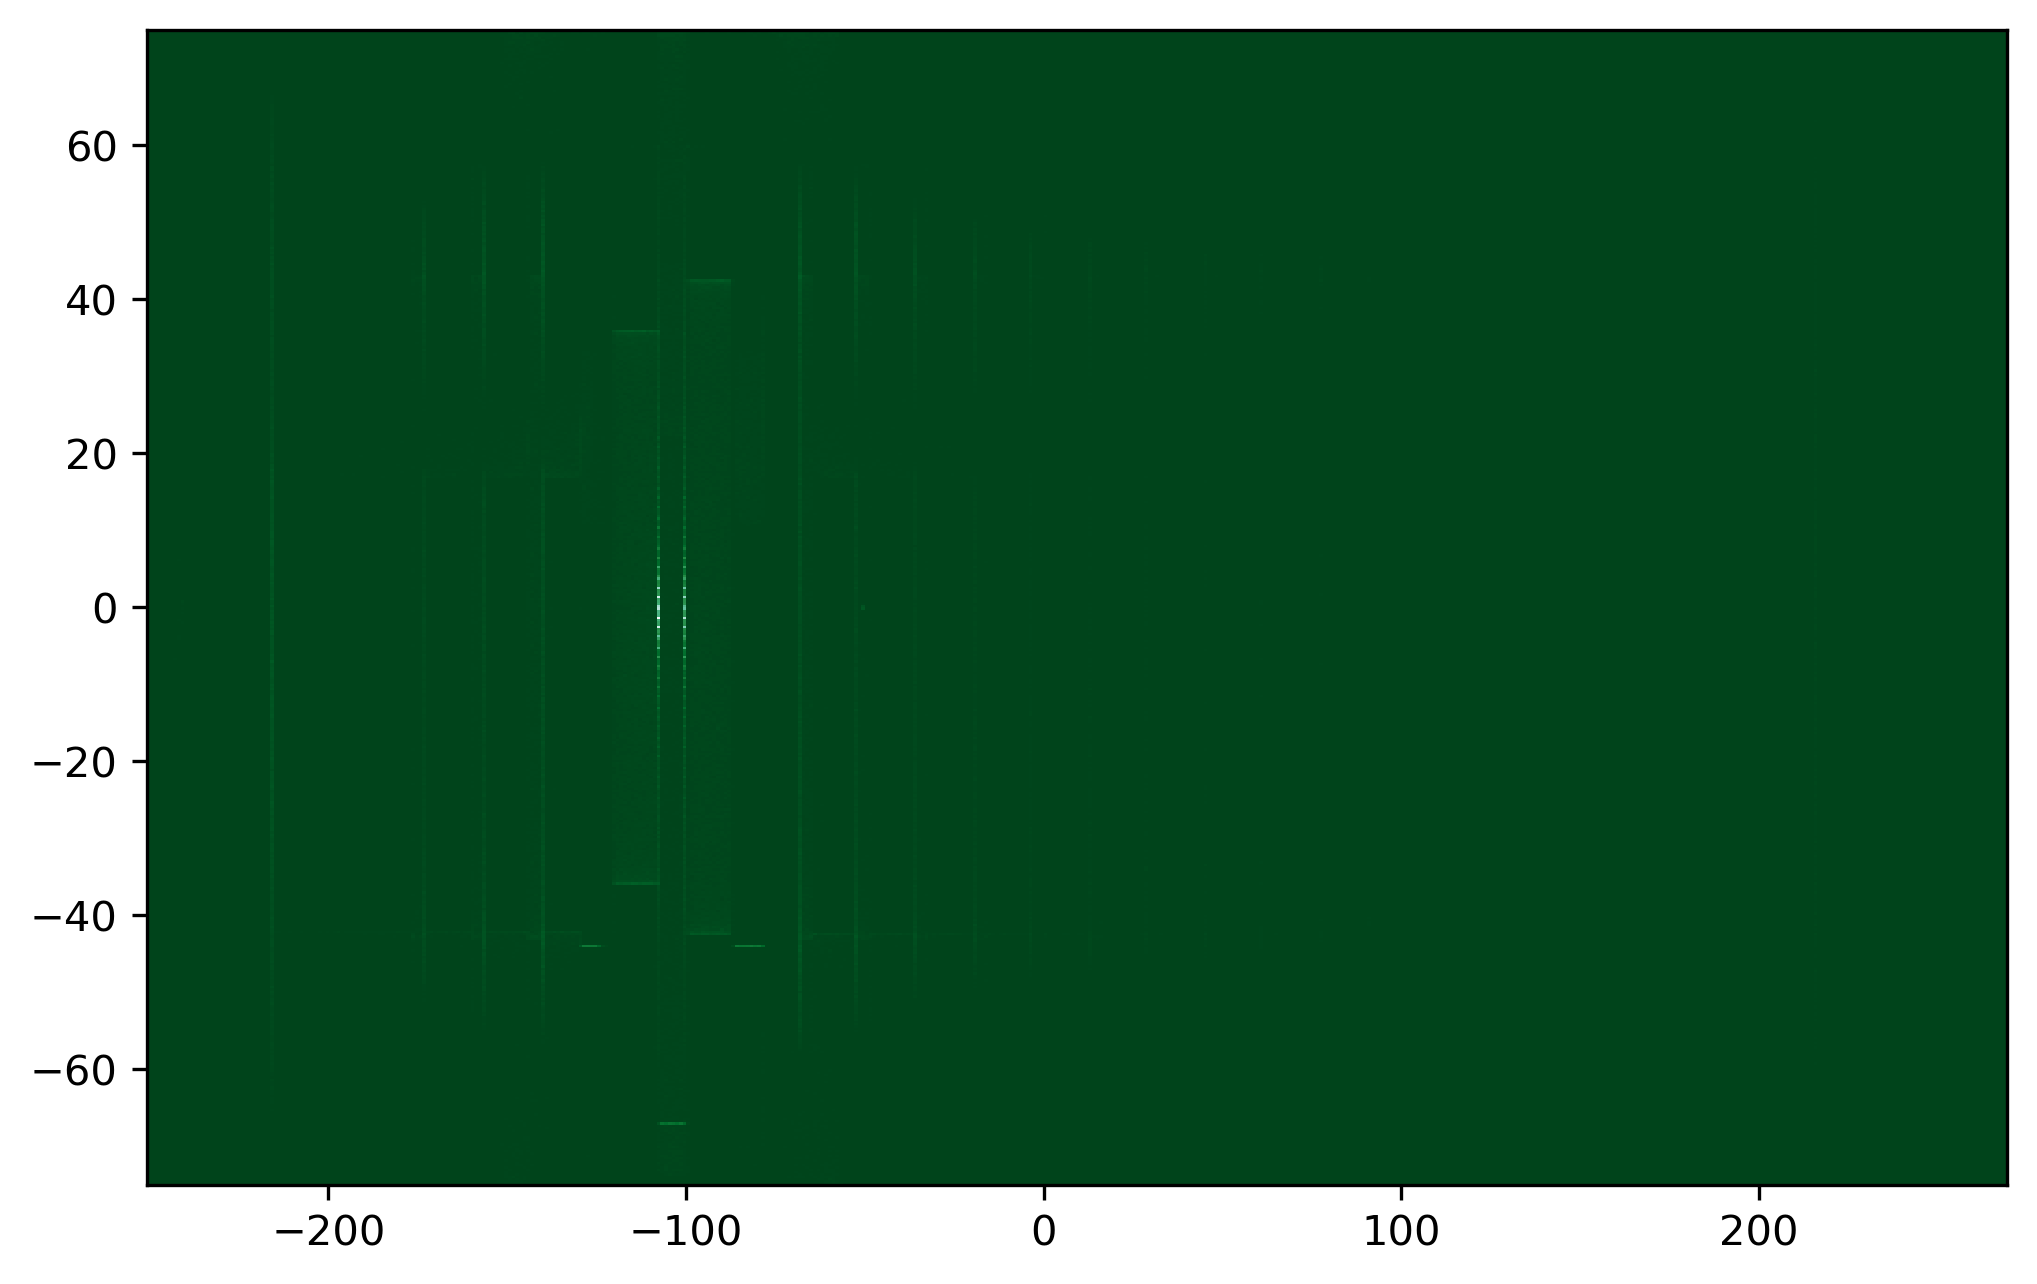

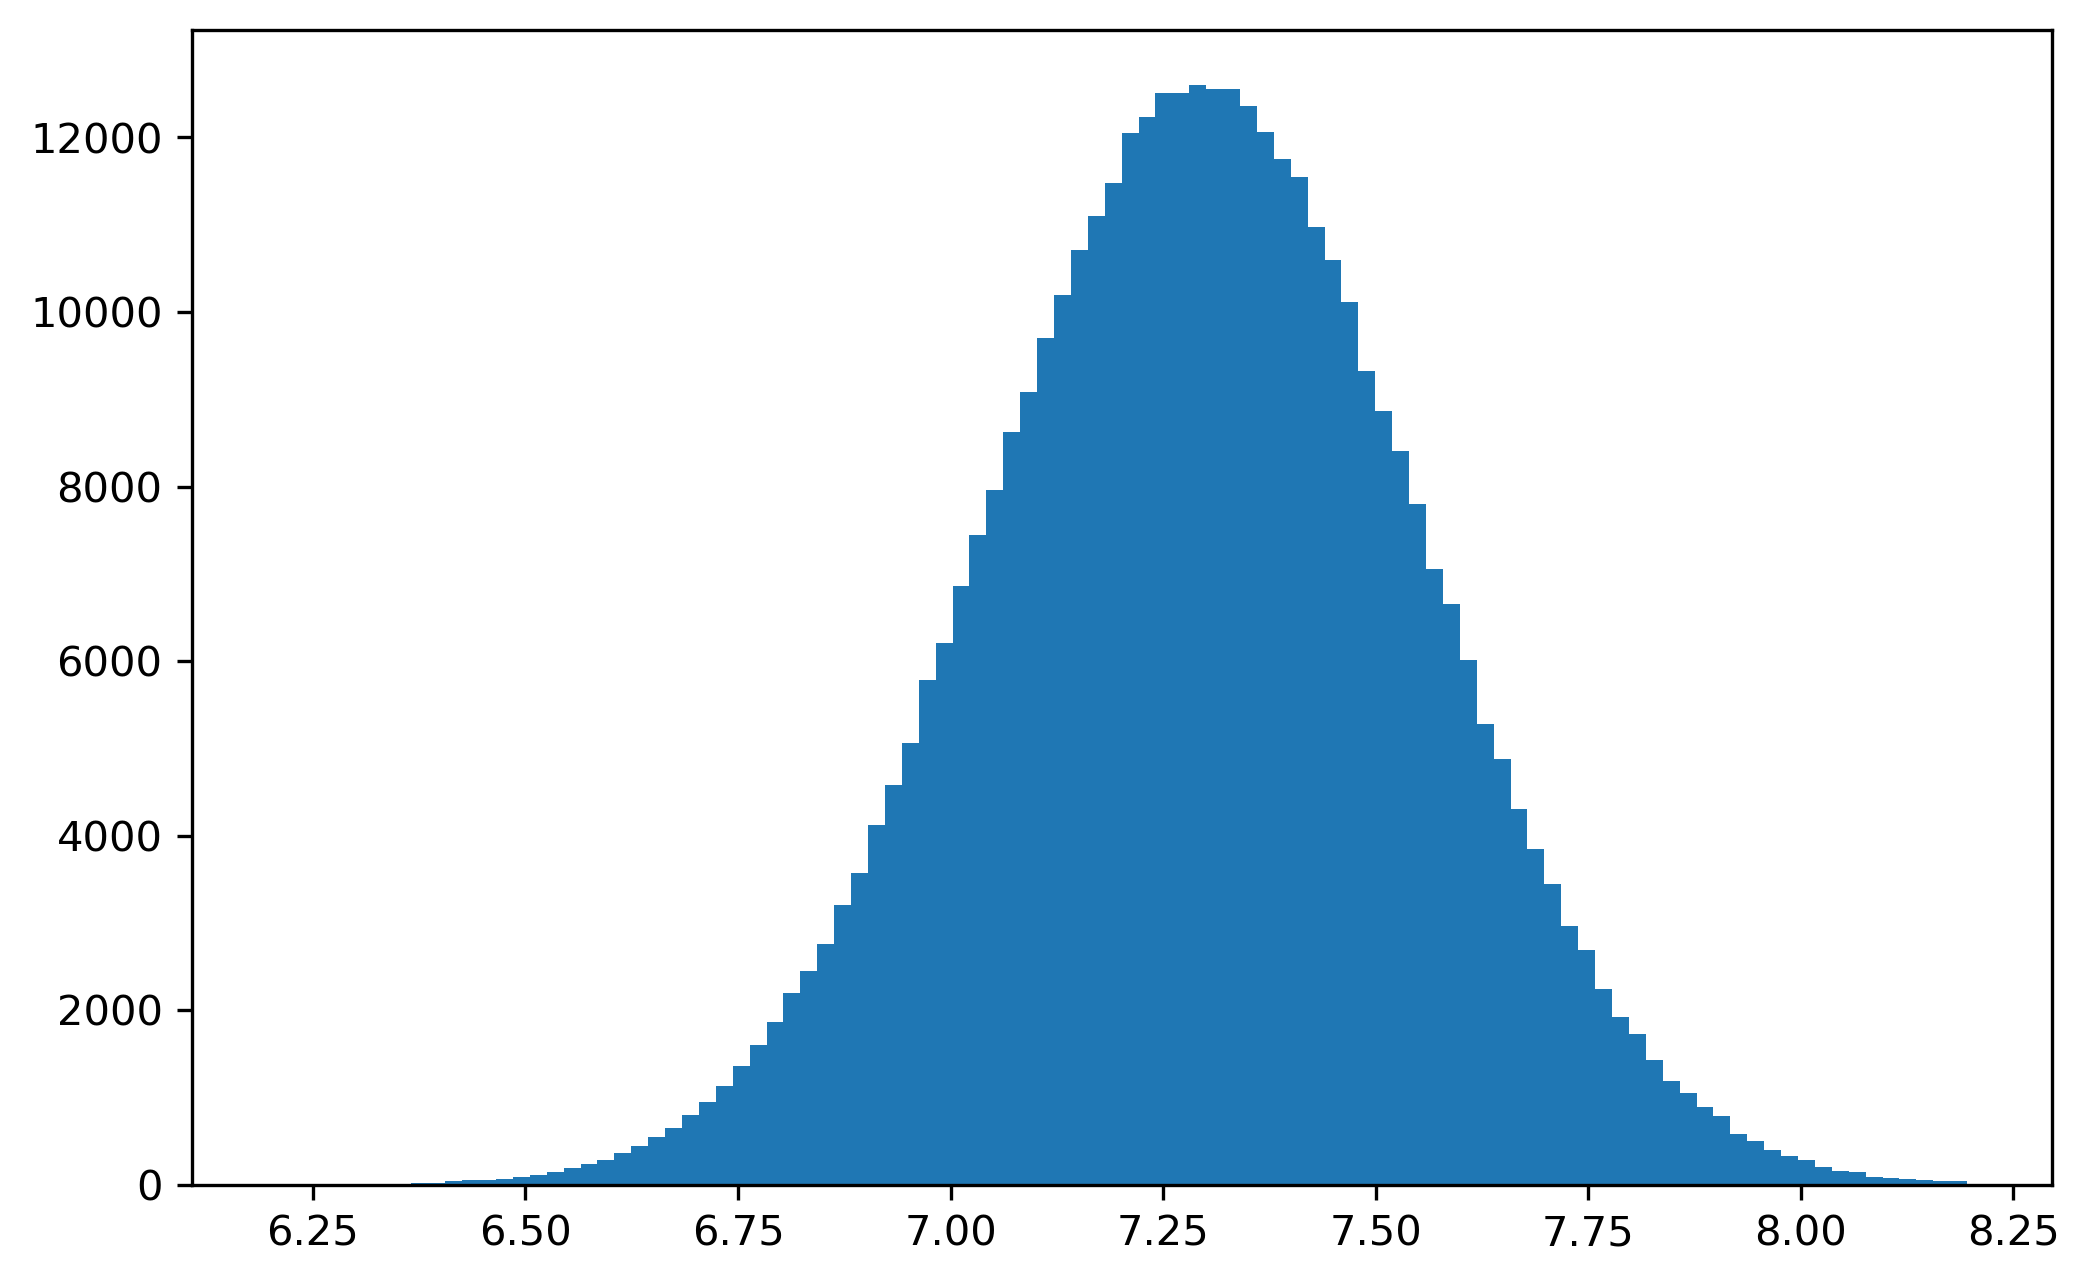

 Mean --> 170.13999938964844 FWHM --> 14.09 


In [6]:

plt.figure(figsize=(8,5),dpi=300)
plt.hist2d(Data[0][0][2],Data[0][0][1],bins=(500,500),cmap=plt.cm.BuGn_r)
plt.show()
plt.figure(figsize=(8,5),dpi=300)
E=Data[0][2]*1e6 ### Conversion from MegaElectronVolt GEANT4 Thing
plt.hist(E,bins=100)
plt.show()
E=(1239.8/E)
mean=(np.mean(E))
FWHM=2.355*np.std(E)
#stdev=st.stdev(np.array(Data[0][2]))
print(f" Mean --> {round(mean,2)} FWHM --> {round(FWHM,2)} ")

In [ ]:
L172nm=getParticles("/media/ilker/Ilker/CRAB/Simulation/Alpha_Gaussian_172nm_1000events.h5")


In [ ]:
df_172 = pd.DataFrame(L172nm[0][1])

In [ ]:
print(df_172.value_counts())

In [ ]:
L170nm=getParticles("/media/ilker/Ilker/CRAB/Simulation/Alpha_Gaussian_170nm_1000events.h5")


In [ ]:
df_170 = pd.DataFrame(L170nm[0][1])

In [ ]:
#Data2=getParticles("/media/ilker/Ilker/CRAB/Simulation/For_Nick/WithNicksYieldv2.h5")